In [1]:
# Neccesary Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

In [3]:
# Loading Dataset
file_path = './machine_failure_dataset.csv'
df = pd.read_csv(file_path)
df.head()

,Temperature,Vibration,Power_Usage,Humidity,Machine_Type,Failure_Risk
0,74.967142,56.996777,8.649643,20.460962,Mill,1
1,68.617357,54.623168,9.710963,25.698075,Lathe,0
2,76.476885,50.298152,8.415160,27.931972,Drill,1
3,85.230299,46.765316,9.384077,39.438438,Lathe,1
4,67.658466,53.491117,6.212771,32.782766,Drill,1


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature,1000.0,70.193321,9.792159,37.587327,63.524097,70.253006,76.479439,108.527315
Vibration,1000.0,50.354181,4.987272,35.298057,46.968792,50.315386,53.644411,65.965538
Power_Usage,1000.0,10.011668,1.966909,3.960976,8.704001,9.999498,11.321831,17.852475
Humidity,1000.0,29.906404,5.135663,15.352757,26.312898,30.000923,33.334727,46.215465
Failure_Risk,1000.0,0.300000,0.458487,0.000000,0.000000,0.000000,1.000000,1.000000


In [5]:
# Check for Null Values
df.isnull().sum()

,0
Temperature,0
Vibration,0
Power_Usage,0
Humidity,0
Machine_Type,0
Failure_Risk,0


In [6]:
# Check of type
df.info()

print('-'*50)
# Encode Machine_Type
df.Machine_Type.value_counts()

# One Hot Encoding
df = pd.get_dummies(df,columns = ['Machine_Type'],drop_first = True)

print('-'*50)

df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Temperature   1000 non-null   float64
 1   Vibration     1000 non-null   float64
 2   Power_Usage   1000 non-null   float64
 3   Humidity      1000 non-null   float64
 4   Machine_Type  1000 non-null   object 
 5   Failure_Risk  1000 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 47.0+ KB
--------------------------------------------------
--------------------------------------------------


,Temperature,Vibration,Power_Usage,Humidity,Failure_Risk,Machine_Type_Lathe,Machine_Type_Mill
0,74.967142,56.996777,8.649643,20.460962,1,False,True
1,68.617357,54.623168,9.710963,25.698075,0,True,False
2,76.476885,50.298152,8.415160,27.931972,1,False,False
3,85.230299,46.765316,9.384077,39.438438,1,True,False
4,67.658466,53.491117,6.212771,32.782766,1,False,False


In [7]:
cols = df.columns

In [8]:
cols

Index(['Temperature', 'Vibration', 'Power_Usage', 'Humidity', 'Failure_Risk',
       'Machine_Type_Lathe', 'Machine_Type_Mill'],
      dtype='object')

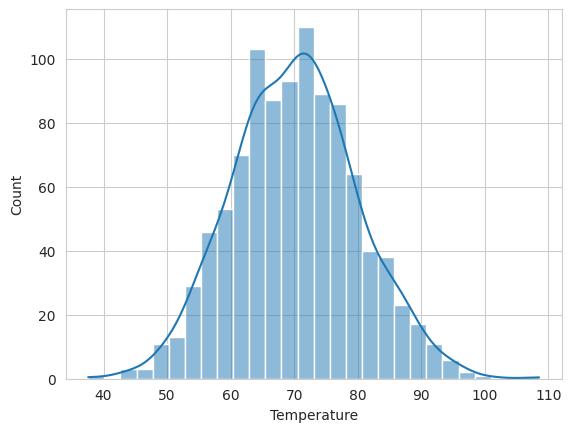

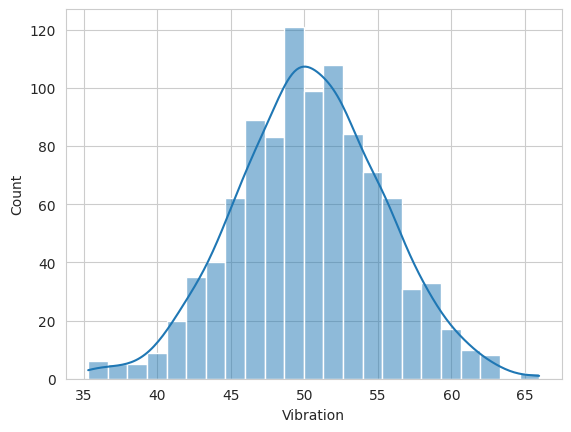

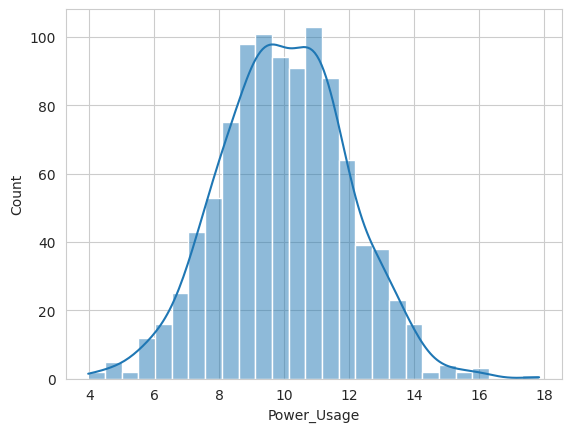

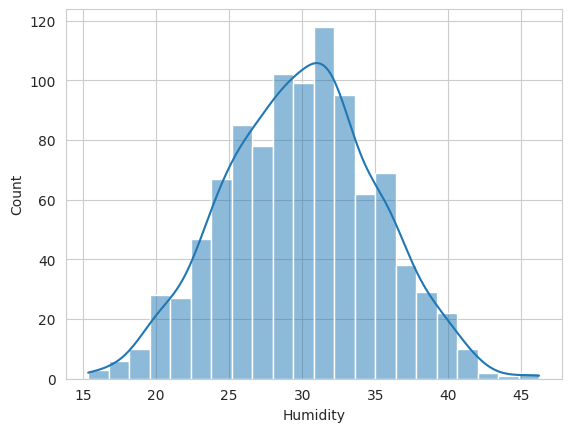

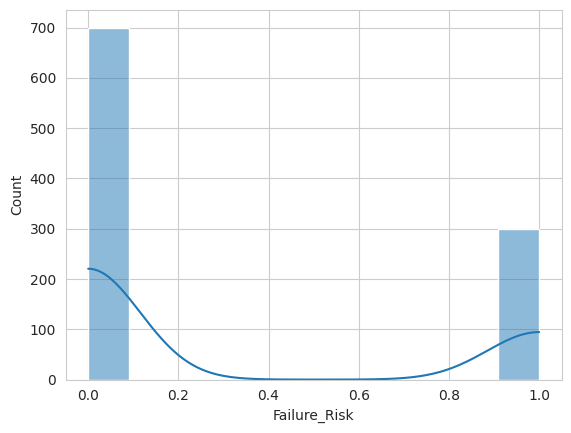

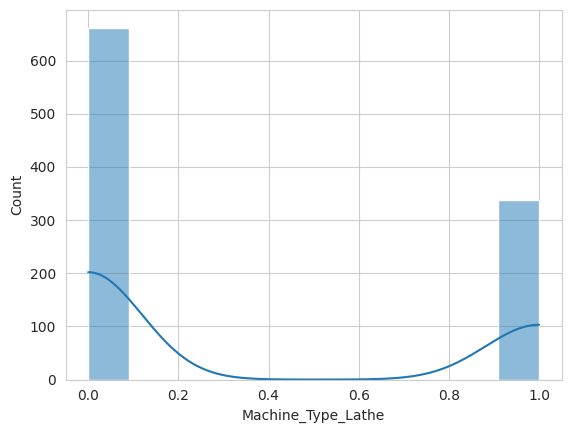

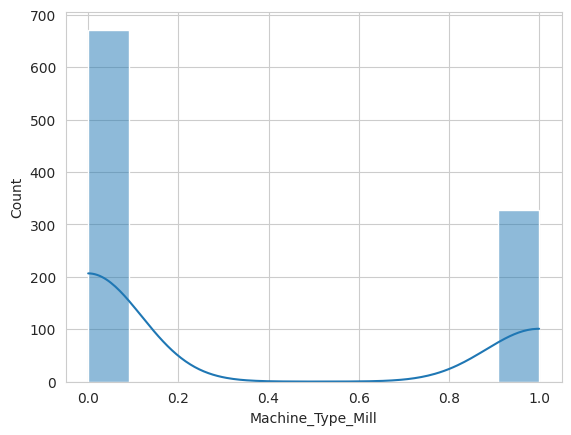

In [9]:
# Plot Data Distributions
for col in df.columns:
    sns.histplot(df[col],kde = True)
    plt.show()

In [10]:
cols

Index(['Temperature', 'Vibration', 'Power_Usage', 'Humidity', 'Failure_Risk',
       'Machine_Type_Lathe', 'Machine_Type_Mill'],
      dtype='object')

In [11]:
def check_outliers(col, df):
    """
    desc : Identifies outliers in a specified column of a DataFrame using the IQR method.
    i/p  : col <str> - Column Name, df <DataFrame> - Dataset
    o/p  : DataFrame with outliers and a summary of outliers
    """

    # Before
    sns.boxplot(df[col])
    plt.title(col + ' Box Plot')
    plt.show()

    # Outlier Present ?
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    pos_t = Q3 + 1.5 * IQR
    neg_t = Q1 - 1.5 * IQR

    outliers = df[(df[col] < neg_t) | (df[col] > pos_t)]

    if len(outliers) == 0:
        status = 'No'
    else:
        status = 'Yes'

    outlier_summary = {
        'Present': status,
        'Lower Bound': neg_t,
        'Upper Bound': pos_t,
        'Number Of Outliers' : outliers.shape[0]
    }

    if status == 'Yes':
        df.drop(outliers.index, inplace=True)
        # After dropping outliers
        sns.boxplot(df[col])
        plt.title(col + ' Box Plot (After Outlier Treatment)')
        plt.show()

    return outlier_summary, df


In [12]:
df.columns[:]

Index(['Temperature', 'Vibration', 'Power_Usage', 'Humidity', 'Failure_Risk',
       'Machine_Type_Lathe', 'Machine_Type_Mill'],
      dtype='object')

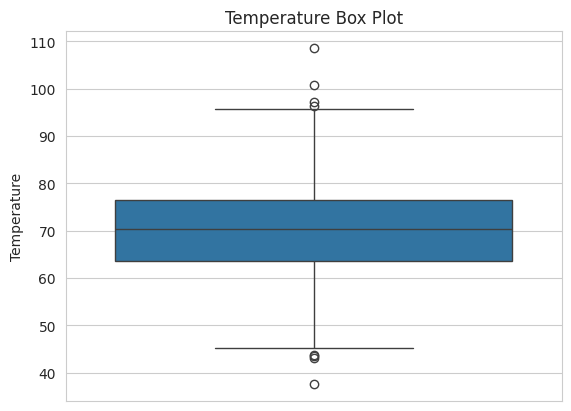

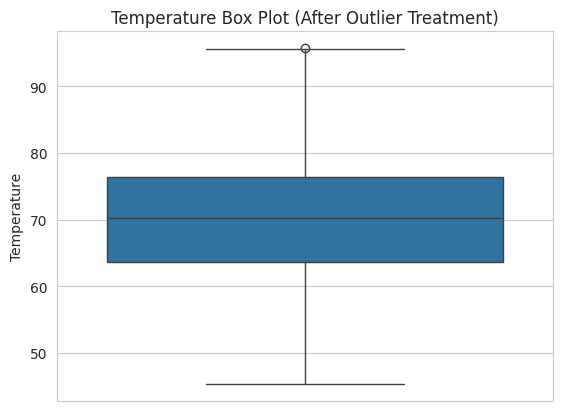

{'Present': 'Yes', 'Lower Bound': 44.09108423624999, 'Upper Bound': 95.91245146625002, 'Number Of Outliers': 8}
--------------------------------------------------


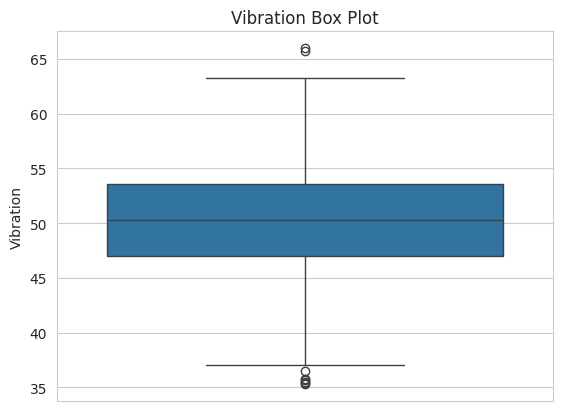

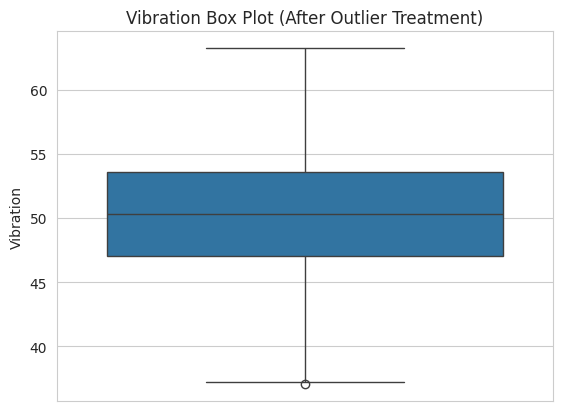

{'Present': 'Yes', 'Lower Bound': 36.999029137499996, 'Upper Bound': 63.585062237500004, 'Number Of Outliers': 8}
--------------------------------------------------


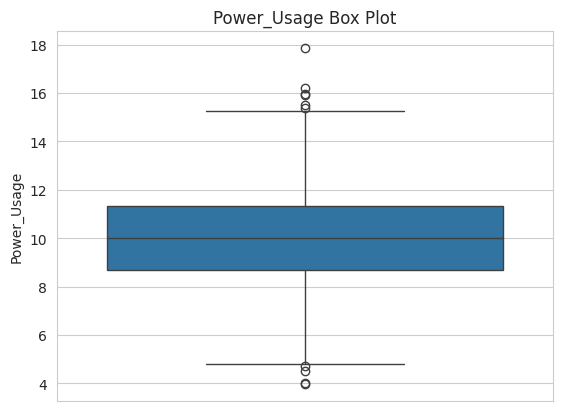

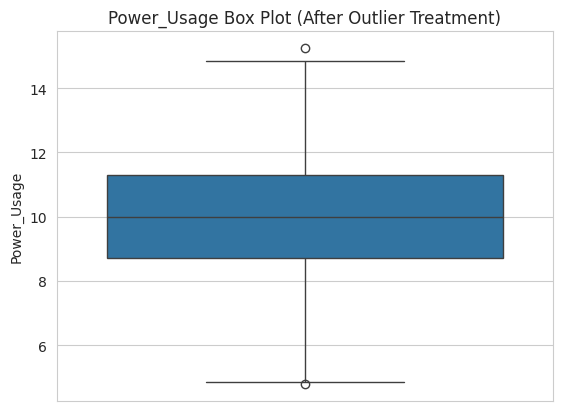

{'Present': 'Yes', 'Lower Bound': 4.752786543125, 'Upper Bound': 15.279596274125, 'Number Of Outliers': 10}
--------------------------------------------------


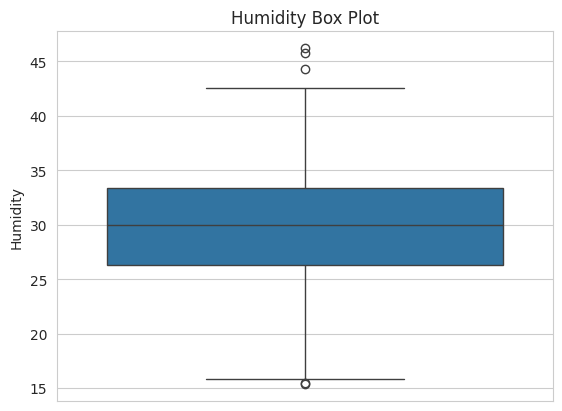

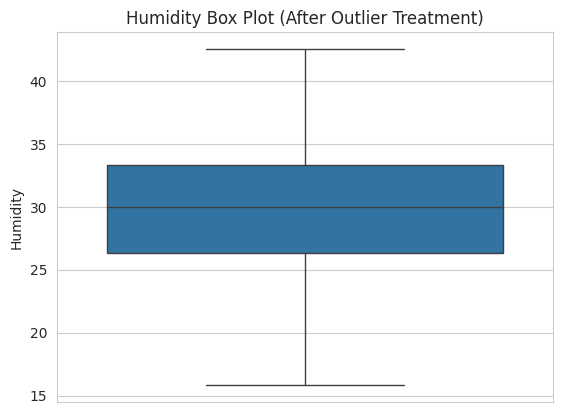

{'Present': 'Yes', 'Lower Bound': 15.687876921249998, 'Upper Bound': 44.00392393125, 'Number Of Outliers': 5}
--------------------------------------------------


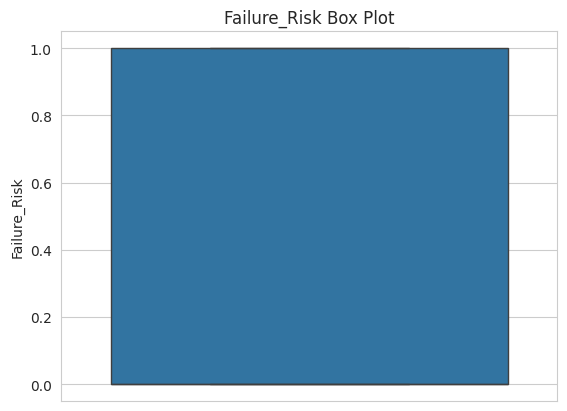

{'Present': 'No', 'Lower Bound': -1.5, 'Upper Bound': 2.5, 'Number Of Outliers': 0}
--------------------------------------------------


In [13]:
for col in df.columns[0:5]:
    outlier_summary, df = check_outliers(col, df)
    print(outlier_summary)
    print('-'*50)


In [14]:
df.head()

,Temperature,Vibration,Power_Usage,Humidity,Failure_Risk,Machine_Type_Lathe,Machine_Type_Mill
0,74.967142,56.996777,8.649643,20.460962,1,False,True
1,68.617357,54.623168,9.710963,25.698075,0,True,False
2,76.476885,50.298152,8.415160,27.931972,1,False,False
3,85.230299,46.765316,9.384077,39.438438,1,True,False
4,67.658466,53.491117,6.212771,32.782766,1,False,False


In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature,969.0,70.259810,9.529039,45.283555,63.622600,70.297561,76.513913,95.733598
Vibration,969.0,50.386118,4.836046,37.044789,46.993162,50.334954,53.625479,63.221717
Power_Usage,969.0,9.992708,1.891036,4.791572,8.700470,9.986957,11.300900,15.241586
Humidity,969.0,29.904931,5.037104,15.839222,26.316149,29.998432,33.327084,42.557783
Failure_Risk,969.0,0.299278,0.458178,0.000000,0.000000,0.000000,1.000000,1.000000


In [16]:
X = df.drop(['Failure_Risk'],axis = 1)
y = df.Failure_Risk

In [17]:
# Scale the data

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [18]:
# Split Build Evaluate

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Make predictions
y_pred_log_reg = log_reg.predict(X_test)

# Evaluate model
print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log_reg))
print("Classification Report:\n", classification_report(y_test, y_pred_log_reg))

# Train model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn.predict(X_test)

# Evaluate model
print("K-Nearest Neighbors")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))

# Train model
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm.predict(X_test)

# Evaluate model
print("Support Vector Machine")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

# Train model
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm.predict(X_test)

# Evaluate model
print("Support Vector Machine")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

# Train model
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

# Make predictions
y_pred_random_forest = random_forest.predict(X_test)

# Evaluate model
print("Random Forest")
print("Accuracy:", accuracy_score(y_test, y_pred_random_forest))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_random_forest))
print("Classification Report:\n", classification_report(y_test, y_pred_random_forest))

Logistic Regression
Accuracy: 0.7010309278350515
Confusion Matrix:
 [[136   0]
 [ 58   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.70      1.00      0.82       136
           1       0.00      0.00      0.00        58

    accuracy                           0.70       194
   macro avg       0.35      0.50      0.41       194
weighted avg       0.49      0.70      0.58       194

K-Nearest Neighbors
Accuracy: 0.634020618556701
Confusion Matrix:
 [[114  22]
 [ 49   9]]
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.84      0.76       136
           1       0.29      0.16      0.20        58

    accuracy                           0.63       194
   macro avg       0.49      0.50      0.48       194
weighted avg       0.58      0.63      0.60       194

Support Vector Machine
Accuracy: 0.7010309278350515
Confusion Matrix:
 [[136   0]
 [ 58   0]]
Classification Report:
